<a href="https://colab.research.google.com/github/nAkshat2103/GraphRAG/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


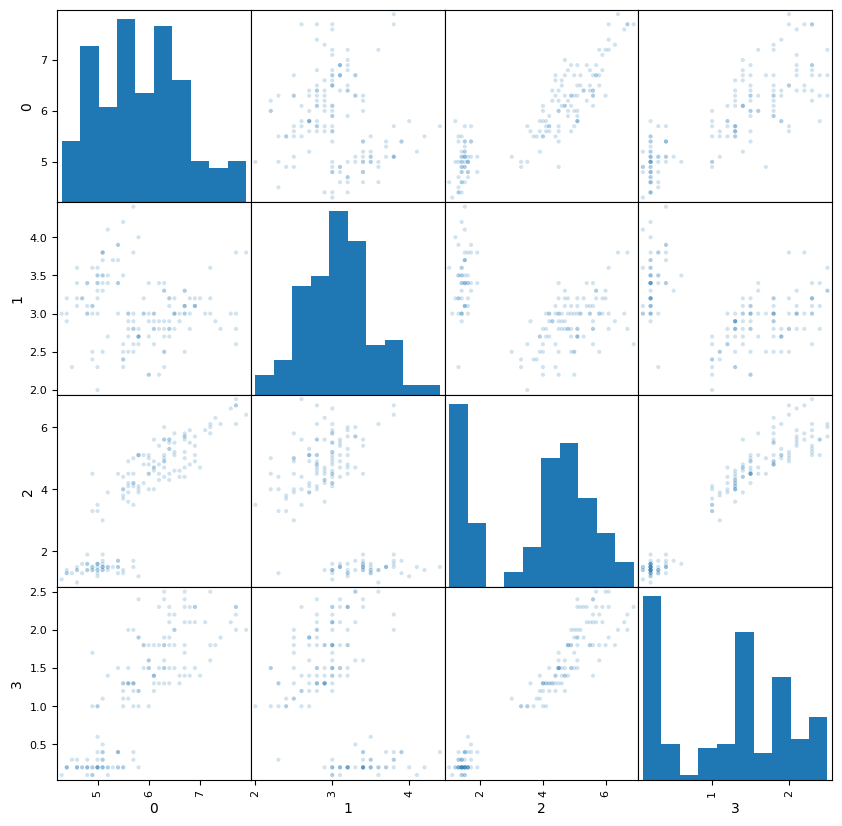

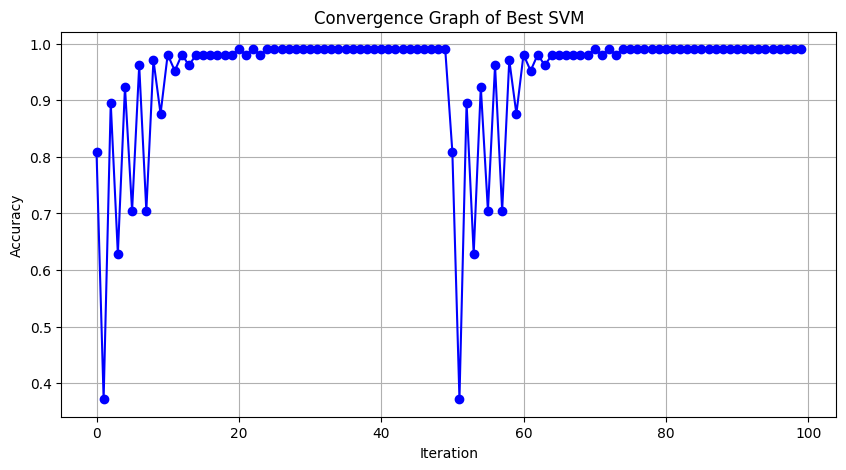

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def load_data():
    data = datasets.load_iris()
    X = data.data
    y = data.target
    return X, y

def split_data(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=None)

def optimize_svm(X_train, y_train):
    kernels = ['linear', 'rbf']
    Cs = np.logspace(-2, 2, 50)
    gammas = ['scale', 'auto']
    accuracy_list = []
    index = 0


    for i in range(100):
        kernel = kernels[i % len(kernels)]
        C = Cs[i % len(Cs)]
        gamma = gammas[i % len(gammas)]
        svc = SVC(kernel=kernel, C=C, gamma=gamma)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_train)
        accuracy = accuracy_score(y_train, y_pred)
        accuracy_list.append(accuracy)

    return accuracy_list

def plot_convergence(accuracy_list):
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy_list, marker='o', linestyle='-', color='b')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Convergence Graph of Best SVM')
    plt.grid(True)
    plt.show()

def data_analysis(X):
    data = pd.DataFrame(X)
    print(data.describe())
    pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(10, 10))
    plt.show()

def main():
    X, y = load_data()
    data_analysis(X)
    X_train, X_test, y_train, y_test = split_data(X, y)
    accuracy_list = optimize_svm(X_train, y_train)
    plot_convergence(accuracy_list)

if __name__ == "__main__":
    main()
